In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/progress_report/"
img_path = os.path.join(report_path, 'img')

[[0.005      0.083      0.424     ]
 [0.00394725 0.00396604 0.20470882]]


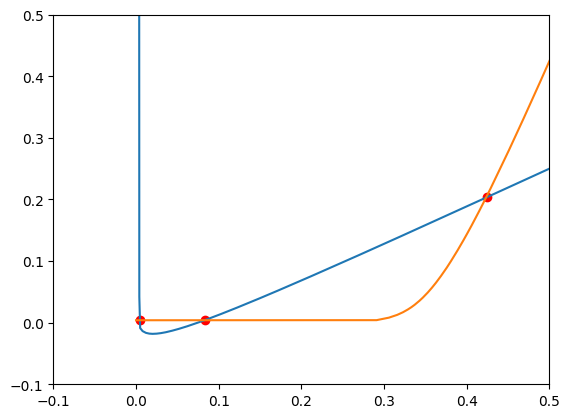

In [95]:
τe = 1
τi = 0.8 * τe
σe = 1
σi = 1 * σe

param = wcp.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9, σ=np.array([σe,σi]))
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
v = v_str*np.ones(param.size).reshape((param.size, 1))
u[0:2**1] = 1
# v[0:2**1] = 1

#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


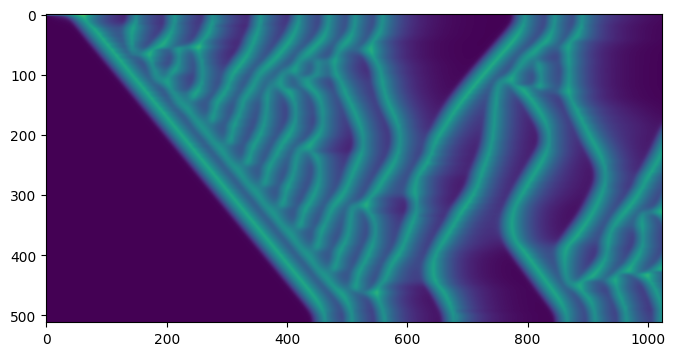

In [96]:
trv_wav = wck.WCDecExpTravelLocal1D(inp, param)

end = 30
step = end/(param.size*2)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u.T, vmin=0, vmax=1)


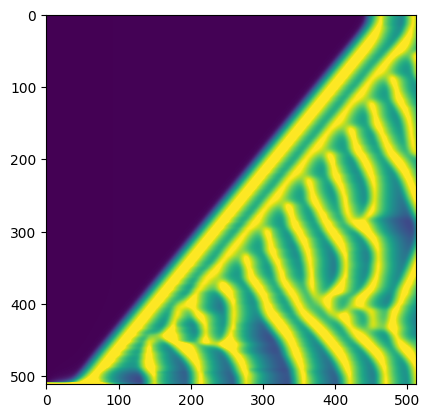

In [97]:
# fig = plt.figure(figsize=(10,20))
plt.imshow(np.flip(res.u.T[:,:512], axis=0), aspect='equal', vmin=0, vmax=0.5)# plt.colorbar()


In [500]:
np.median(res.v.T[-1])

0.2030275418725171

In [275]:
size = 2**8
abss = np.abs(np.linspace(-2*size, 2*size, 2*size-1))
# DEe = decreasing_exponential(abss, σe)


In [135]:
np.log2(abss.size+1)

9.0